In [102]:
# Imports needed for the script
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

from sklearn.tree import DecisionTreeClassifier

import pandas as pd
import numpy as np

In [104]:
df = pd.read_csv('TrainingSet.csv', index_col = 0 )
names=['URLCount','R1Time', 'CrawlIssues', 'WebsitePriority', 'ErrorCount', 'R2Time', 'IncorrectGuidance']
print(df.shape)
df

(132, 41)


,DateReceived,Website,URLCount,R1Time,CrawlIssues,WebReviewDif,WebsitePriority,ErrorCount,R2Time,TeamLeadSBQ,...,IncorrectGuidance,Other?,Was it a PSF?,MXQA_Encoded,TeamLead_Encoded,QM_Encoded,Month_Encoded,DP_Encoded,DualReviewer_Encoded,Batch Status
632,10/18/2021,deerstags.com,17,140,100,5,QM Check Urgent,0,71,0,...,False,0,False,8.0,2.0,6.0,3.0,2.0,21.0,0
621,10/18/2021,mgchemicals.com,194,500,0,4,QM Check Needed,1,190,0,...,False,0,False,34.0,4.0,6.0,3.0,7.0,NaN,0
703,10/26/2021,godogfun.com,30,90,0,1,PSF,0,30,0,...,False,0,True,26.0,3.0,7.0,3.0,8.0,NaN,1
223,11/16/2021,tourit.com,20,120,0,1,PSF,4,70,1,...,False,0,True,29.0,3.0,6.0,2.0,8.0,NaN,1
14,NaT,manicpanic.com,40,139,25,2,None,3,71,0,...,False,0,False,40.0,3.0,1.0,0.0,2.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,10/7/2021,purplepandastore.com,25,120,0,5,QM Check Needed,0,60,0,...,False,0,False,23.0,5.0,6.0,3.0,8.0,NaN,1
913,9/27/2021,logitech.com,151,139,0,2,PSF,2,71,0,...,False,0,True,23.0,5.0,6.0,4.0,8.0,NaN,1
791,9/27/2021,rollplay.com,20,139,100,2,PSF,2,71,0,...,False,0,True,32.0,2.0,8.0,4.0,8.0,NaN,1
29,NaT,aleradetails.com,40,139,25,2,None,3,71,0,...,False,0,False,17.0,6.0,3.0,1.0,6.0,NaN,0


In [5]:
#df.groupby('CrawlIssues').groups
#print(df.groupby('DP_Encoded').groups)
#df.groupby('DualReviewer_Encoded').groups
#df.groupby('TeamLead_Encoded').groups
#df.groupby('Batch Status').groups

# Data bases
Here we will separete the data in differents forms, the first idea it's just take all the data in the DataBase to see the accuary of the prediction's model, after, using the results of the PCA, we will take diferent information and compare each other.

In [286]:
#All the data (without Website, DataRecived ,....)
All_Features = ['URLCount','R1Time', 'CrawlIssues', 'WebReviewDif','WebsitePriority'
                ,'ErrorCount', 'R2Time', 'TeamLeadSBQ', 'QMSBQ', 'CxPending'
               ,'CxComplete', 'TotalSBQ', 'Sent', 'Title', 'Brand'
               ,'MFR', 'BC', 'Color', 'Size', 'IPQ'
               ,'UC', 'Model', 'UPC', 'MPN', 'WebExtractionDif'
               ,'SloppyError', 'IncorrectVariant', 'NewEdgeCase', 'IncorrectGuidance', 'Other?'
               ,'Was it a 3?', 'MXQA_Encoded',  'QM_Encoded', 'Month_Encoded'
               ,'DP_Encoded']
#
#it's importante transform somethings into the database
#Normalize: QM Check Urgent = 0, QM Check Needed = 1, None = 2, PSF = 3 and SF = 4 
df_normal = pd.read_csv('TrainingSet_2.csv', index_col = 0 )


In [279]:
#Second data
#Using the features that PCA told are the best ones.
features = ['URLCount','R1Time', 'CrawlIssues', 'ErrorCount', 'R2Time', 'IncorrectGuidance']

In [312]:
#Third data
#Using the columns we thoung are better with our experience
features = ['URLCount','R1Time', 'CrawlIssues', 'ErrorCount', 'R2Time', 'IncorrectGuidance']

In [151]:
#The result we decided evalute, it is 'Batch status'
y_feature = 'Batch Status'

# Split data
Usually the form to divide the data to train and to test, it's 70/30, so...

In [334]:
#Assing the data base
data_base = df_normal


max_attributes = len(list(data_base))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
#divido mis datos para entrenar y de prueba, usualmente se hace un 70/30
f_train = data_base[:round(len(data_base)*0.7)] 
f_valid = data_base[round(len(data_base)*0.7):]

0.7575757575757576

In [313]:
#X = f_train['URLCount','R1Time', 'CrawlIssues', 'WebsitePriority', 'ErrorCount', 'R2Time', 'IncorrectGuidance']
# Assign the features: there are 3 differents...
features = features

x = f_train.loc[:,features]
X_test = f_valid.loc[:,features]
y = f_train.loc[:, 'Batch Status']
y_test = f_valid.loc[:, 'Batch Status']

#Transform_To_array
x_array_train = x.to_numpy()
y_array_train = y.to_numpy()

In [326]:
model   = DecisionTreeClassifier(max_depth=15, random_state=6, max_features = 'auto')

model_2 = DecisionTreeClassifier(max_depth=max_attributes, random_state=42, max_features = 'auto')
model_3 = DecisionTreeClassifier(max_depth=max_attributes, random_state=0)
model_4 = DecisionTreeClassifier(max_depth=max_attributes, random_state=42, max_features = 'auto')

model_V2 = DecisionTreeClassifier(random_state=0, max_features = 'auto')
model_V2_2 = DecisionTreeClassifier(random_state=0)

model_V3 = DecisionTreeClassifier()

#Trining:
model.fit(x_array_train, y_array_train)

DecisionTreeClassifier(max_depth=15, max_features='auto', random_state=6)

In [327]:
##Prediction
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import cross_val_score

y_pred = model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
#cross_val_score(model, X_test, y_test,cv=10)

Accuracy: 0.625


In [328]:
from sklearn.tree import export_graphviz
export_graphviz(model, 'tree.dot', feature_names = features)

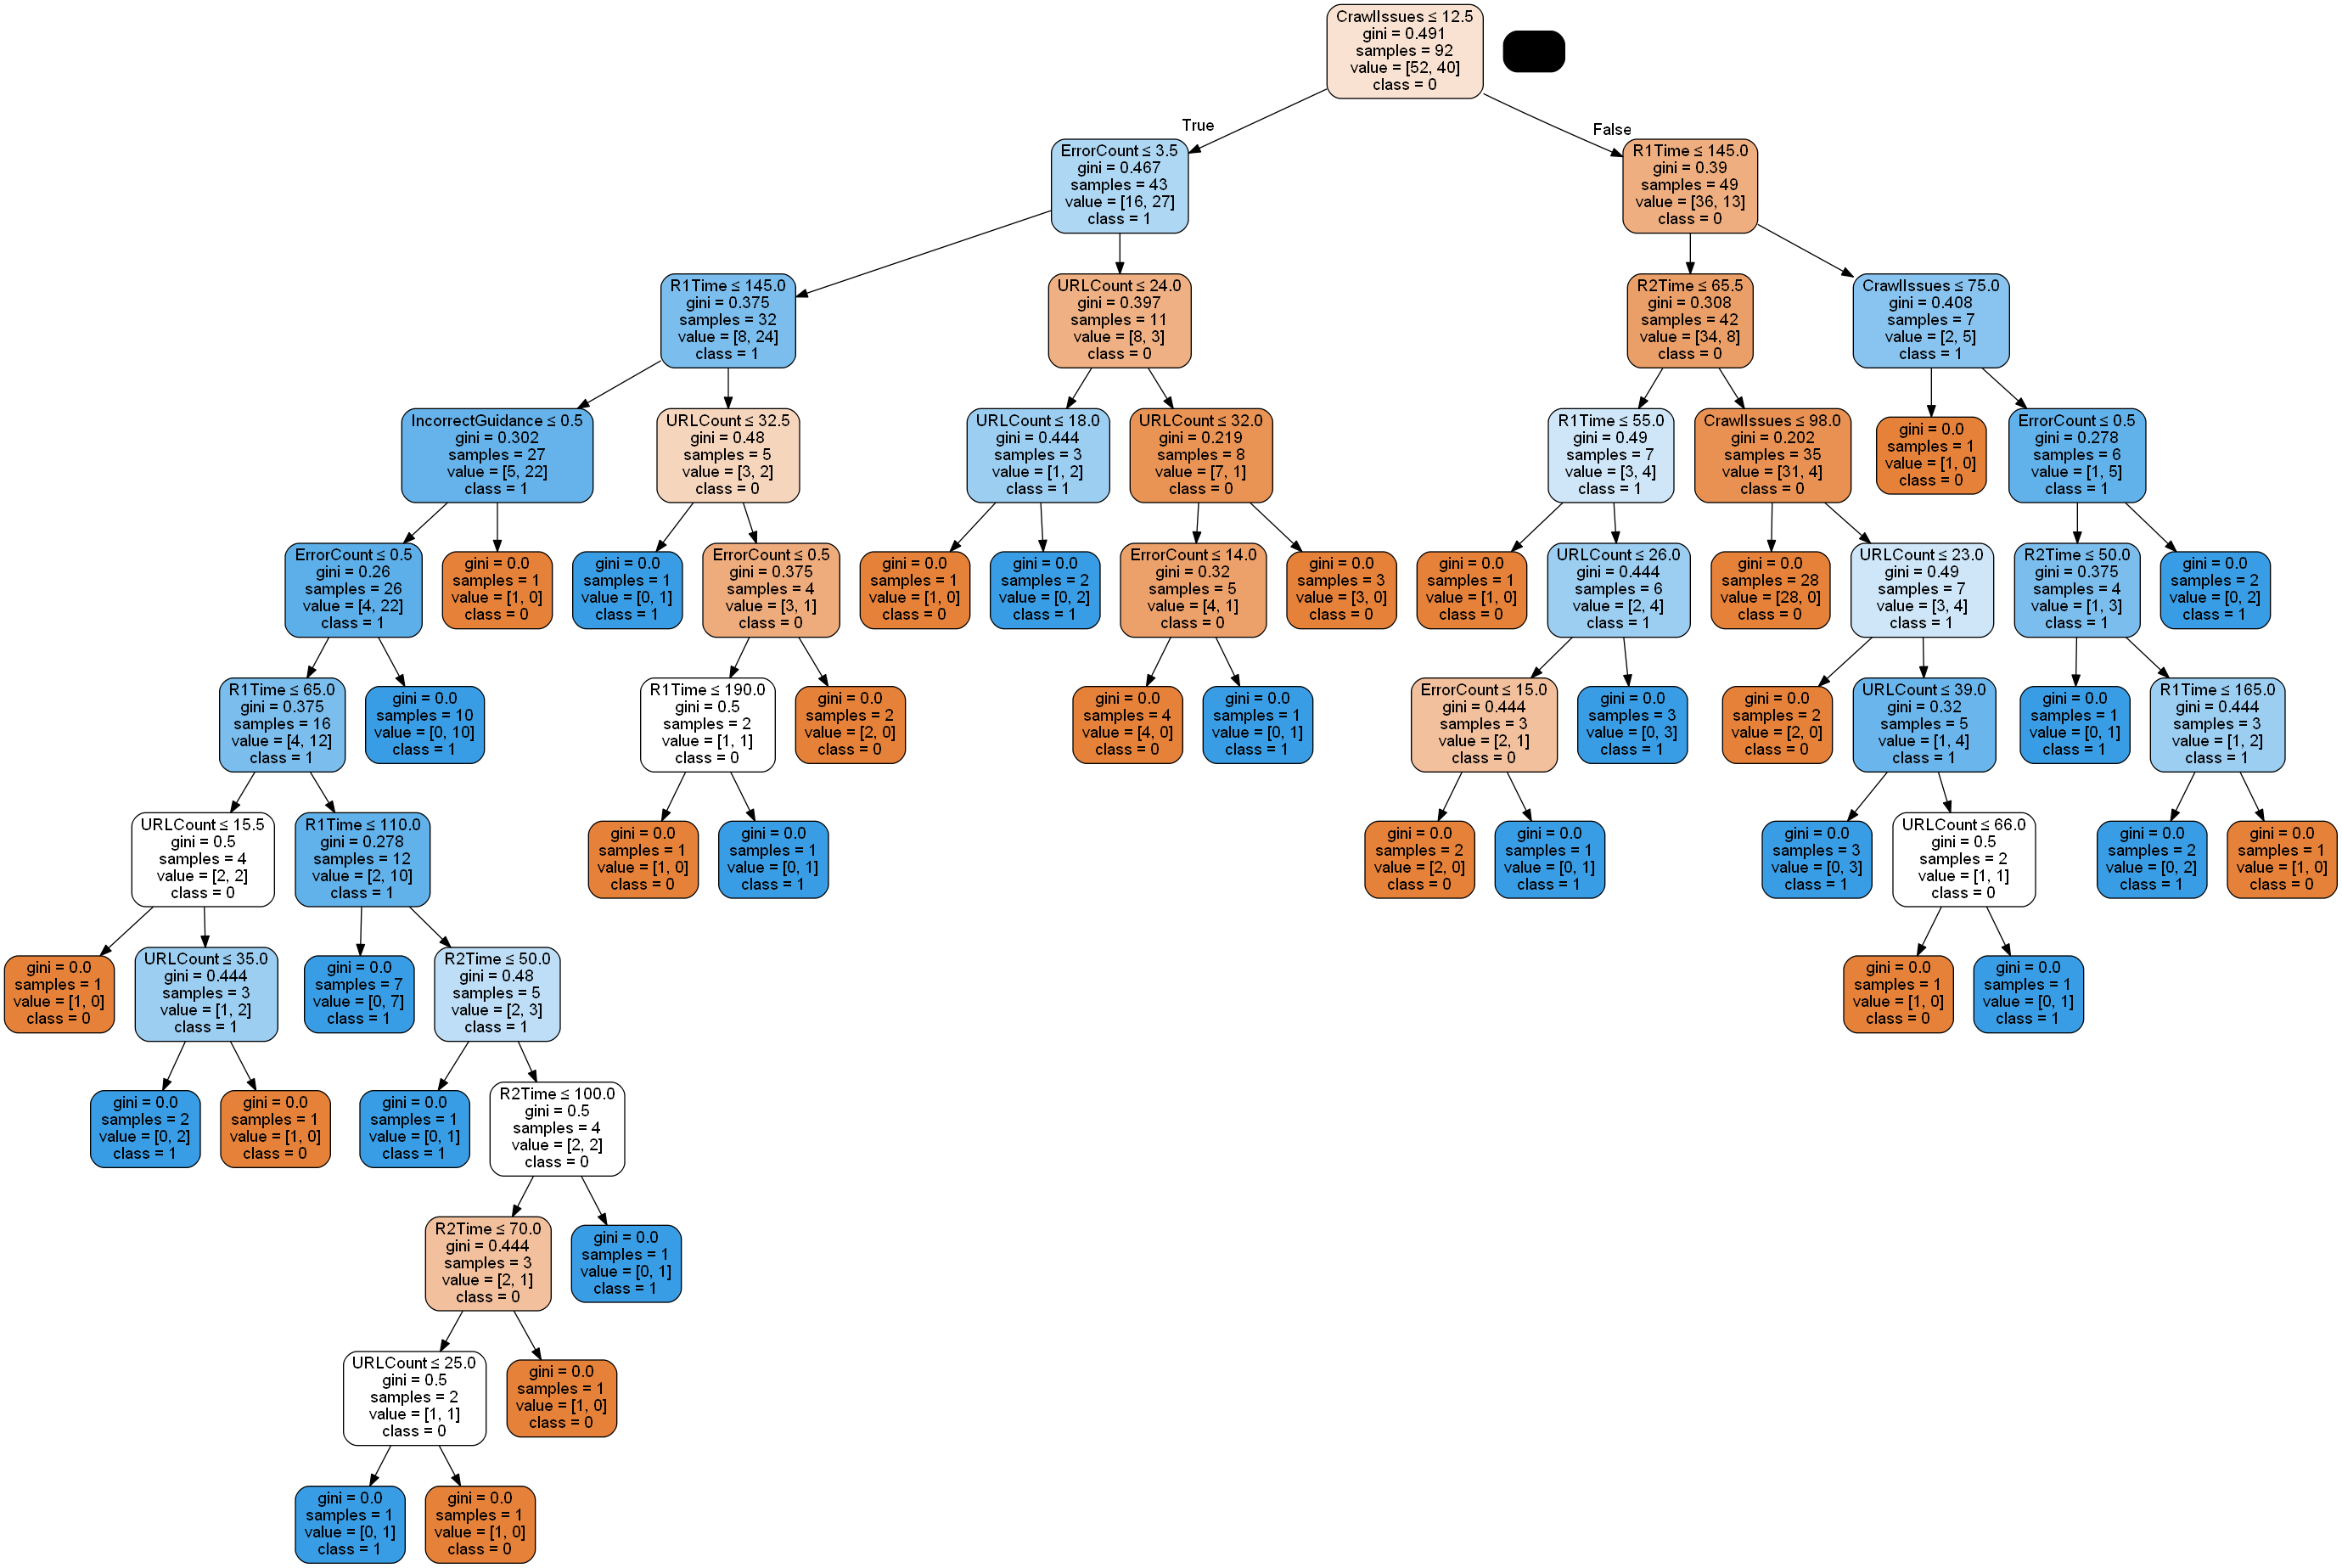

In [335]:
from sklearn.tree import export_graphviz 
from io import StringIO 
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())